In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [6]:
from sklearn.metrics import precision_recall_curve

In [7]:
data= pd.read_csv("DATA.csv")
data

,v025,v106,v151,v157,v158,v159,v169a,v171a,v190,v394,...,media_exposure,religion_recode,age_houseohld_head_recoded,bord_category,birth_interval_coded,timing_ANC_check_recoded,new_num_children,new_ANC_visit,working_status,place_of_delivery
0,0,1,0,0,0,0,0,0,4,1,...,0,8,1,2,2,1,0,2,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,8,2,0,3,0,1,2,1,1
2,0,1,0,0,0,0,0,0,3,1,...,0,8,2,1,3,0,1,0,1,1
3,0,1,1,0,2,0,0,0,4,1,...,0,8,2,1,1,0,0,2,1,1
4,0,1,0,0,2,0,0,0,1,1,...,0,8,1,1,2,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86004,0,1,0,0,2,0,0,0,1,1,...,1,4,2,1,3,1,0,3,0,0
86005,0,1,0,0,0,0,0,0,3,1,...,0,7,2,3,3,1,1,3,0,0
86006,0,2,0,0,2,0,1,0,3,1,...,1,4,2,2,3,1,1,2,1,1
86007,0,1,1,0,1,0,1,0,1,1,...,1,6,1,1,3,0,0,3,1,1


In [8]:
##Data Preprocessing/Feauture selection
X = data.drop('place_of_delivery',axis=1)
y = data.place_of_delivery
num_features_opt = 40   # the number of features that we need to choose as a result
num_features_max = 60   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [9]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()

X_resampled, y_resampled = smote_enn.fit_resample(data.loc[:, data.columns != 'place_of_delivery'], data['place_of_delivery'])
print("Shape of X_resampled: {}".format(X_resampled.shape))
print("Shape of y_resampled: {}".format(y_resampled.shape))

Shape of X_resampled: (84610, 23)
Shape of y_resampled: (84610,)


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_train_valid_test(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Usage example
X_train_resampled, X_valid_resampled, X_test_resampled, y_train_resampled, y_valid_resampled, y_test_resampled = split_train_valid_test(X_resampled, y_resampled, test_size=0.3, random_state=42)
_, train_counts = np.unique(y_train_resampled, return_counts=True)
_, valid_counts = np.unique(y_valid_resampled, return_counts=True)
_, test_counts = np.unique(y_test_resampled, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0], train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0], valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0], test_counts[1]))

[train] # class 0: 21240 | # class 1: 12603
[valid] # class 0: 15931 | # class 1: 9453
[test]  # class 0: 15931 | # class 1: 9452


In [17]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Healthcare delivery in East Africa")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
def plot_cm(y_test,y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    # labels, title and ticks
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["No", "Yes"]);
    ax.yaxis.set_ticklabels(["No", "Yes"]);
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [41]:
# Support Vector Machine (SVM)
start = timer.time()
svm_model = SVC(kernel='poly',probability=True)
svm_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_resampled_std)
y_svm_prob = svm_model.predict_proba(X_test_resampled_std)

Finished training within 127.81 seconds


Accuracy score for SVM: 0.91
Precision score for SVM: 0.89
Recall score for SVM: 0.86
F1 score for SVM: 0.88
Sensitivity score for SVM: 0.86
Specificity score for SVM: 0.94
AUC score for SVM: 0.96


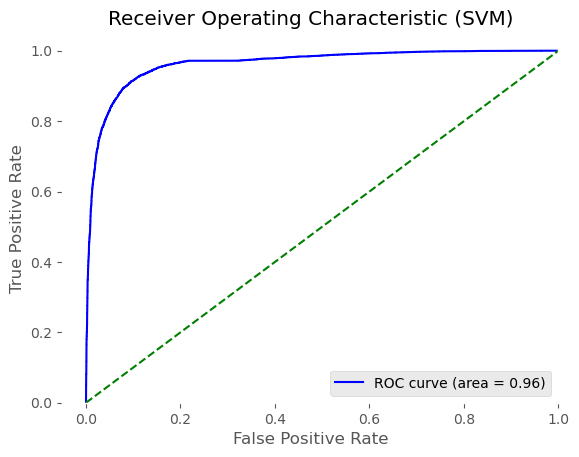

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
}

# Create the SVM model
svm_model = SVC(kernel='rbf', probability=True)

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best SVM model with the optimal hyperparameters
best_svm_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_svm = best_svm_model.predict(X_test_resampled_std)
y_svm_prob = best_svm_model.predict_proba(X_test_resampled_std)

accuracy_score_svm = accuracy_score(y_test_resampled, y_svm)
print("Accuracy score for SVM: {:.2f}".format(accuracy_score_svm))

# Calculate precision, recall, and F1 scores
prec_svm = precision_score(y_test_resampled, y_svm)
rec_svm = recall_score(y_test_resampled, y_svm)
f1_svm = f1_score(y_test_resampled, y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_svm).ravel()
sens_svm = tp / (tp + fn)
spec_svm = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test_resampled, y_svm_prob[:,1])

print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

Classification report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15931
           1       0.89      0.86      0.88      9452

    accuracy                           0.91     25383
   macro avg       0.91      0.90      0.90     25383
weighted avg       0.91      0.91      0.91     25383

Confusion matrix for SVM:
[[14970   961]
 [ 1343  8109]]
Accuracy score for SVM: 0.91
Precision score for SVM: 0.89
Recall score for SVM: 0.86
F1 score for SVM: 0.88
Sensitivity score for SVM: 0.86
Specificity score for SVM: 0.94
AUC score for SVM: 0.96


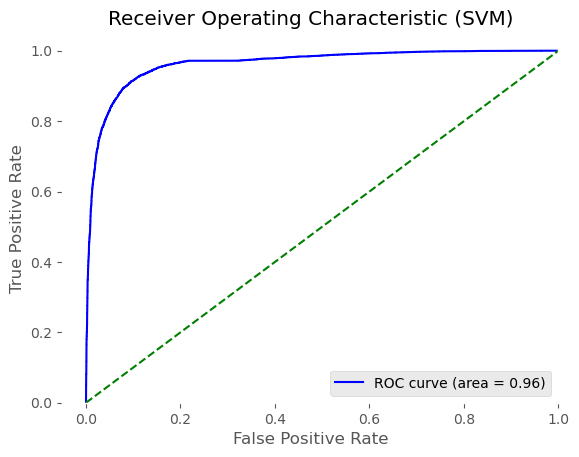

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have the necessary data and have imported the required libraries

# Print classification report
print("Classification report for SVM:\n{}".format(classification_report(y_test_resampled, y_svm)))

# Print confusion matrix
print("Confusion matrix for SVM:\n{}".format(confusion_matrix(y_test_resampled, y_svm)))

# Calculate and print accuracy score
accuracy_score_svm = accuracy_score(y_test_resampled, y_svm)
print("Accuracy score for SVM: {:.2f}".format(accuracy_score_svm))

# Calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test_resampled, y_svm)
rec_svm = recall_score(y_test_resampled, y_svm)
f1_svm = f1_score(y_test_resampled, y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Calculate sensitivity, specificity, and AUC
sens_svm, spec_svm = calc_sens_spec(y_test_resampled, y_svm)
fpr, tpr, _ = roc_curve(y_test_resampled, y_svm_prob[:, 1])
auc_svm = roc_auc_score(y_test_resampled, y_svm_prob[:, 1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [18]:
#Gaussian Naive Bayes (GNB)
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_resampled_std)
y_gnb_prob = gnb_model.predict_proba(X_test_resampled_std)

Finished training within 0.15 seconds


Accuracy score for GNB: 0.80
Precision score for GNB: 0.78
Recall score for GNB: 0.63
F1 score for GNB: 0.70
Sensitivity score for GNB: 0.63
Specificity score for GNB: 0.90
AUC score for GNB: 0.88


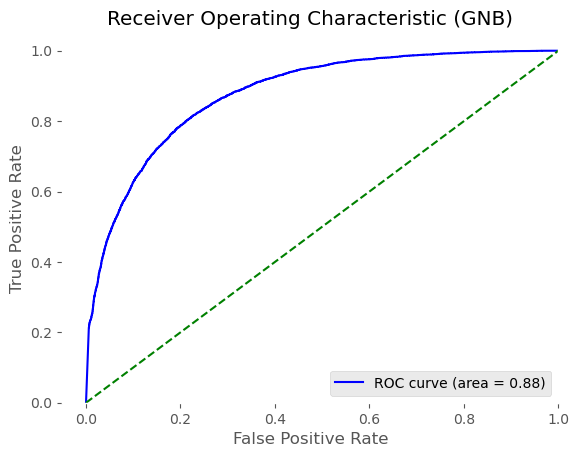

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create the GNB model
gnb_model = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gnb_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best GNB model with the optimal hyperparameters
best_gnb_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_gnb = best_gnb_model.predict(X_test_resampled_std)
y_gnb_prob = best_gnb_model.predict_proba(X_test_resampled_std)

accuracy_score_gnb = accuracy_score(y_test_resampled, y_gnb)
print("Accuracy score for GNB: {:.2f}".format(accuracy_score_gnb))

# Calculate precision, recall, and F1 scores
prec_gnb = precision_score(y_test_resampled, y_gnb)
rec_gnb = recall_score(y_test_resampled, y_gnb)
f1_gnb = f1_score(y_test_resampled, y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_gnb).ravel()
sens_gnb = tp / (tp + fn)
spec_gnb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_gnb_prob[:, 1])
auc_gnb = roc_auc_score(y_test_resampled, y_gnb_prob[:, 1])

print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specificity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_logit = logit_model.predict(X_test_resampled_std)
y_logit_prob = logit_model.predict_proba(X_test_resampled_std)

Finished training within 0.47 seconds


Accuracy score for Logistic Regression: 0.84
Precision score for Logistic Regression: 0.81
Recall score for Logistic Regression: 0.74
F1 score for Logistic Regression: 0.78
Sensitivity score for Logistic Regression: 0.74
Specificity score for Logistic Regression: 0.90
AUC score for Logistic Regression: 0.91


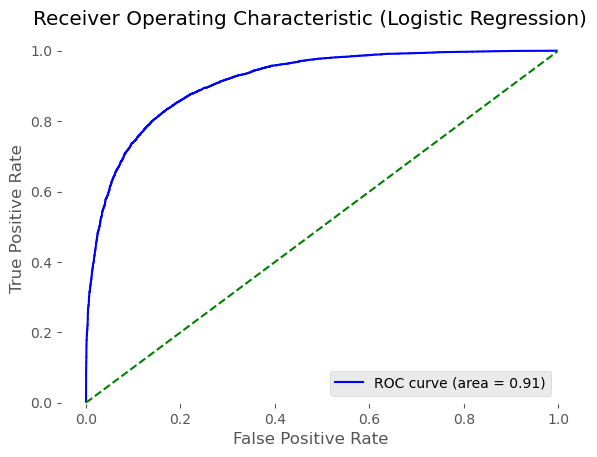

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the Logistic Regression model
logit_model = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logit_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best Logistic Regression model with the optimal hyperparameters
best_logit_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_logit = best_logit_model.predict(X_test_resampled_std)
y_logit_prob = best_logit_model.predict_proba(X_test_resampled_std)

accuracy_score_logit = accuracy_score(y_test_resampled, y_logit)
print("Accuracy score for Logistic Regression: {:.2f}".format(accuracy_score_logit))

# Calculate precision, recall, and F1 scores
prec_logit = precision_score(y_test_resampled, y_logit)
rec_logit = recall_score(y_test_resampled, y_logit)
f1_logit = f1_score(y_test_resampled, y_logit)
print("Precision score for Logistic Regression: {:.2f}".format(prec_logit))
print("Recall score for Logistic Regression: {:.2f}".format(rec_logit))
print("F1 score for Logistic Regression: {:.2f}".format(f1_logit))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_logit).ravel()
sens_logit = tp / (tp + fn)
spec_logit = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_logit_prob[:, 1])
auc_logit = roc_auc_score(y_test_resampled, y_logit_prob[:, 1])

print("Sensitivity score for Logistic Regression: {:.2f}".format(sens_logit))
print("Specificity score for Logistic Regression: {:.2f}".format(spec_logit))
print("AUC score for Logistic Regression: {:.2f}".format(auc_logit))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Logistic Regression)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [24]:
##  DT
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_resampled_std)
y_dtree_prob = dtree_model.predict_proba(X_test_resampled_std)

Finished training within 0.60 seconds


Accuracy score for Decision Tree Classifier: 0.87
Precision score for Decision Tree Classifier: 0.85
Recall score for Decision Tree Classifier: 0.80
F1 score for Decision Tree Classifier: 0.83
Sensitivity score for Decision Tree Classifier: 0.80
Specificity score for Decision Tree Classifier: 0.91
AUC score for Decision Tree Classifier: 0.86


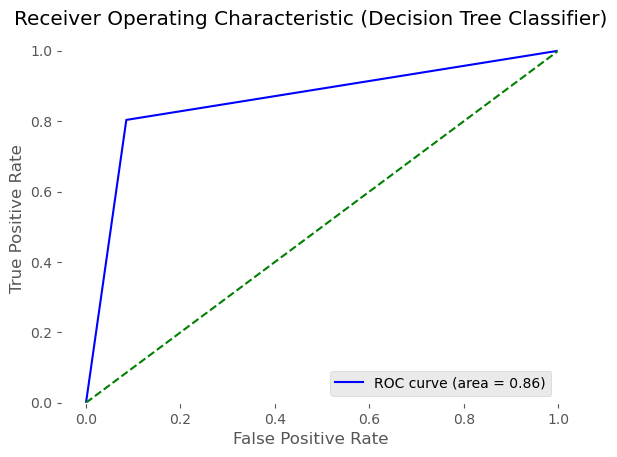

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the Decision Tree Classifier model
dtree_model = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dtree_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best Decision Tree Classifier model with the optimal hyperparameters
best_dtree_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_dtree = best_dtree_model.predict(X_test_resampled_std)
y_dtree_prob = best_dtree_model.predict_proba(X_test_resampled_std)

accuracy_score_dtree = accuracy_score(y_test_resampled, y_dtree)
print("Accuracy score for Decision Tree Classifier: {:.2f}".format(accuracy_score_dtree))

# Calculate precision, recall, and F1 scores
prec_dtree = precision_score(y_test_resampled, y_dtree)
rec_dtree = recall_score(y_test_resampled, y_dtree)
f1_dtree = f1_score(y_test_resampled, y_dtree)
print("Precision score for Decision Tree Classifier: {:.2f}".format(prec_dtree))
print("Recall score for Decision Tree Classifier: {:.2f}".format(rec_dtree))
print("F1 score for Decision Tree Classifier: {:.2f}".format(f1_dtree))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_dtree).ravel()
sens_dtree = tp / (tp + fn)
spec_dtree = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_dtree_prob[:, 1])
auc_dtree = roc_auc_score(y_test_resampled, y_dtree_prob[:, 1])

print("Sensitivity score for Decision Tree Classifier: {:.2f}".format(sens_dtree))
print("Specificity score for Decision Tree Classifier: {:.2f}".format(spec_dtree))
print("AUC score for Decision Tree Classifier: {:.2f}".format(auc_dtree))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Decision Tree Classifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [26]:
## RF
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_resampled_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_resampled_std)

Finished training within 3.31 seconds


Accuracy score for RandomForestClassifier: 0.92
Precision score for RandomForestClassifier: 0.92
Recall score for RandomForestClassifier: 0.88
F1 score for RandomForestClassifier: 0.90
Sensitivity score for RandomForestClassifier: 0.88
Specificity score for RandomForestClassifier: 0.95
AUC score for RandomForestClassifier: 0.98


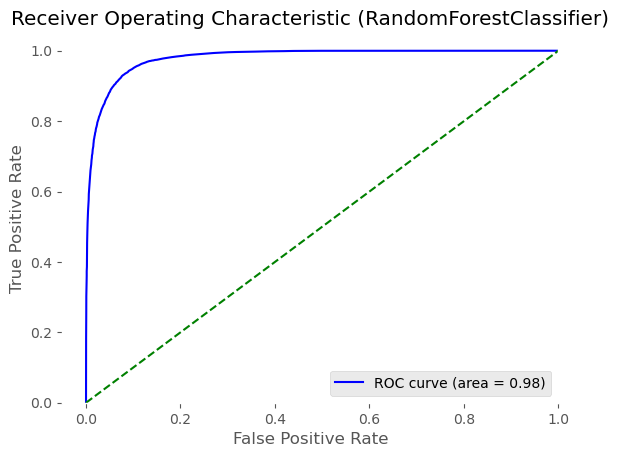

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the RandomForestClassifier model
ranfor_model = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ranfor_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best RandomForestClassifier model with the optimal hyperparameters
best_ranfor_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_ranfor = best_ranfor_model.predict(X_test_resampled_std)
y_ranfor_prob = best_ranfor_model.predict_proba(X_test_resampled_std)

accuracy_score_ranfor = accuracy_score(y_test_resampled, y_ranfor)
print("Accuracy score for RandomForestClassifier: {:.2f}".format(accuracy_score_ranfor))

# Calculate precision, recall, and F1 scores
prec_ranfor = precision_score(y_test_resampled, y_ranfor)
rec_ranfor = recall_score(y_test_resampled, y_ranfor)
f1_ranfor = f1_score(y_test_resampled, y_ranfor)
print("Precision score for RandomForestClassifier: {:.2f}".format(prec_ranfor))
print("Recall score for RandomForestClassifier: {:.2f}".format(rec_ranfor))
print("F1 score for RandomForestClassifier: {:.2f}".format(f1_ranfor))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_ranfor).ravel()
sens_ranfor = tp / (tp + fn)
spec_ranfor = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_ranfor_prob[:, 1])
auc_ranfor = roc_auc_score(y_test_resampled, y_ranfor_prob[:, 1])

print("Sensitivity score for RandomForestClassifier: {:.2f}".format(sens_ranfor))
print("Specificity score for RandomForestClassifier: {:.2f}".format(spec_ranfor))
print("AUC score for RandomForestClassifier: {:.2f}".format(auc_ranfor))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RandomForestClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [29]:
## LGBM
start = timer.time()
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gb = gb_model.predict(X_test_resampled_std)
y_gb_prob = gb_model.predict_proba(X_test_resampled_std)

Finished training within 2.81 seconds


Accuracy score for GradientBoostingClassifier: 0.91
Precision score for GradientBoostingClassifier: 0.90
Recall score for GradientBoostingClassifier: 0.86
F1 score for GradientBoostingClassifier: 0.88
Sensitivity score for GradientBoostingClassifier: 0.86
Specificity score for GradientBoostingClassifier: 0.94
AUC score for GradientBoostingClassifier: 0.97


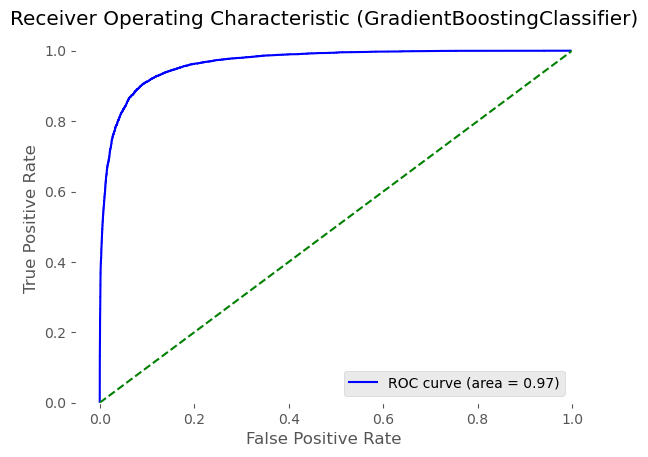

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best GradientBoostingClassifier model with the optimal hyperparameters
best_gb_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_gb = best_gb_model.predict(X_test_resampled_std)
y_gb_prob = best_gb_model.predict_proba(X_test_resampled_std)

accuracy_score_gb = accuracy_score(y_test_resampled, y_gb)
print("Accuracy score for GradientBoostingClassifier: {:.2f}".format(accuracy_score_gb))

# Calculate precision, recall, and F1 scores
prec_gb = precision_score(y_test_resampled, y_gb)
rec_gb = recall_score(y_test_resampled, y_gb)
f1_gb = f1_score(y_test_resampled, y_gb)
print("Precision score for GradientBoostingClassifier: {:.2f}".format(prec_gb))
print("Recall score for GradientBoostingClassifier: {:.2f}".format(rec_gb))
print("F1 score for GradientBoostingClassifier: {:.2f}".format(f1_gb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_gb).ravel()
sens_gb = tp / (tp + fn)
spec_gb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_gb_prob[:, 1])
auc_gb = roc_auc_score(y_test_resampled, y_gb_prob[:, 1])

print("Sensitivity score for GradientBoostingClassifier: {:.2f}".format(sens_gb))
print("Specificity score for GradientBoostingClassifier: {:.2f}".format(spec_gb))
print("AUC score for GradientBoostingClassifier: {:.2f}".format(auc_gb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GradientBoostingClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [31]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_resampled_std)
y_xgb_prob = xgb_model.predict_proba(X_test_resampled_std)

Finished training within 2.71 seconds


Accuracy score for XGBClassifier: 0.90
Precision score for XGBClassifier: 0.89
Recall score for XGBClassifier: 0.85
F1 score for XGBClassifier: 0.87
Sensitivity score for XGBClassifier: 0.85
Specificity score for XGBClassifier: 0.94
AUC score for XGBClassifier: 0.97


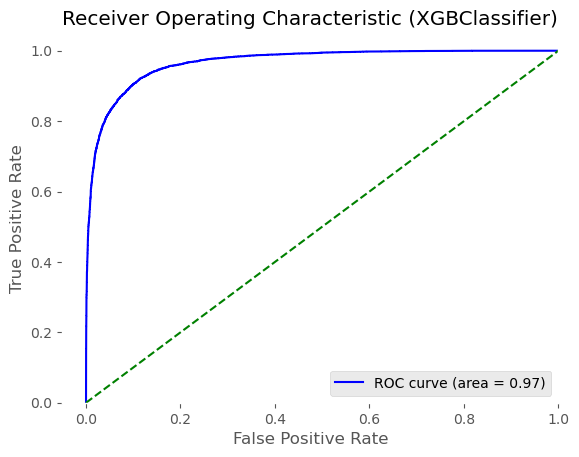

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create the XGBClassifier model
xgb_model = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best XGBClassifier model with the optimal hyperparameters
best_xgb_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_xgb = best_xgb_model.predict(X_test_resampled_std)
y_xgb_prob = best_xgb_model.predict_proba(X_test_resampled_std)

accuracy_score_xgb = accuracy_score(y_test_resampled, y_xgb)
print("Accuracy score for XGBClassifier: {:.2f}".format(accuracy_score_xgb))

# Calculate precision, recall, and F1 scores
prec_xgb = precision_score(y_test_resampled, y_xgb)
rec_xgb = recall_score(y_test_resampled, y_xgb)
f1_xgb = f1_score(y_test_resampled, y_xgb)
print("Precision score for XGBClassifier: {:.2f}".format(prec_xgb))
print("Recall score for XGBClassifier: {:.2f}".format(rec_xgb))
print("F1 score for XGBClassifier: {:.2f}".format(f1_xgb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_xgb).ravel()
sens_xgb = tp / (tp + fn)
spec_xgb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_xgb_prob[:, 1])
auc_xgb = roc_auc_score(y_test_resampled, y_xgb_prob[:, 1])

print("Sensitivity score for XGBClassifier: {:.2f}".format(sens_xgb))
print("Specificity score for XGBClassifier: {:.2f}".format(spec_xgb))
print("AUC score for XGBClassifier: {:.2f}".format(auc_xgb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGBClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
## KNN
start = timer.time()
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled_std, y_train_resampled)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_knn = knn_model.predict(X_test_resampled_std)
y_knn_prob = knn_model.predict_proba(X_test_resampled_std)

Finished training within 0.06 seconds


Accuracy score for KNeighborsClassifier: 0.92
Precision score for KNeighborsClassifier: 0.94
Recall score for KNeighborsClassifier: 0.85
F1 score for KNeighborsClassifier: 0.89
Sensitivity score for KNeighborsClassifier: 0.85
Specificity score for KNeighborsClassifier: 0.97
AUC score for KNeighborsClassifier: 0.96


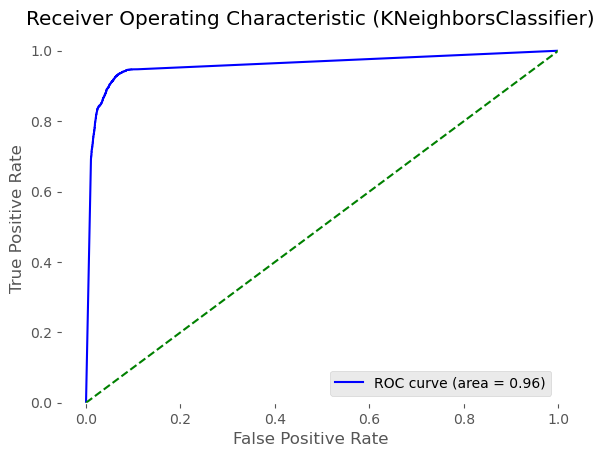

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [30, 40, 50]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best KNeighborsClassifier model with the optimal hyperparameters
best_knn_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_knn = best_knn_model.predict(X_test_resampled_std)
y_knn_prob = best_knn_model.predict_proba(X_test_resampled_std)

accuracy_score_knn = accuracy_score(y_test_resampled, y_knn)
print("Accuracy score for KNeighborsClassifier: {:.2f}".format(accuracy_score_knn))

# Calculate precision, recall, and F1 scores
prec_knn = precision_score(y_test_resampled, y_knn)
rec_knn = recall_score(y_test_resampled, y_knn)
f1_knn = f1_score(y_test_resampled, y_knn)
print("Precision score for KNeighborsClassifier: {:.2f}".format(prec_knn))
print("Recall score for KNeighborsClassifier: {:.2f}".format(rec_knn))
print("F1 score for KNeighborsClassifier: {:.2f}".format(f1_knn))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_knn).ravel()
sens_knn = tp / (tp + fn)
spec_knn = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_knn_prob[:, 1])
auc_knn = roc_auc_score(y_test_resampled, y_knn_prob[:, 1])

print("Sensitivity score for KNeighborsClassifier: {:.2f}".format(sens_knn))
print("Specificity score for KNeighborsClassifier: {:.2f}".format(spec_knn))
print("AUC score for KNeighborsClassifier: {:.2f}".format(auc_knn))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (KNeighborsClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [35]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier model
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Start the timer to measure the training time
start = timer.time()

# Fit the ANN model to the training data
ann_model.fit(X_train_resampled_std, y_train_resampled)

# Stop the timer and calculate the training time
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

# Predict the labels for the test set using the trained ANN model
y_ann = ann_model.predict(X_test_resampled_std)

# Predict the class probabilities for the test set using the trained ANN model
y_ann_prob = ann_model.predict_proba(X_test_resampled_std)

Finished training within 29.68 seconds


Accuracy score for MLPClassifier: 0.89
Precision score for MLPClassifier: 0.88
Recall score for MLPClassifier: 0.80
F1 score for MLPClassifier: 0.84
Sensitivity score for MLPClassifier: 0.80
Specificity score for MLPClassifier: 0.94
AUC score for MLPClassifier: 0.94


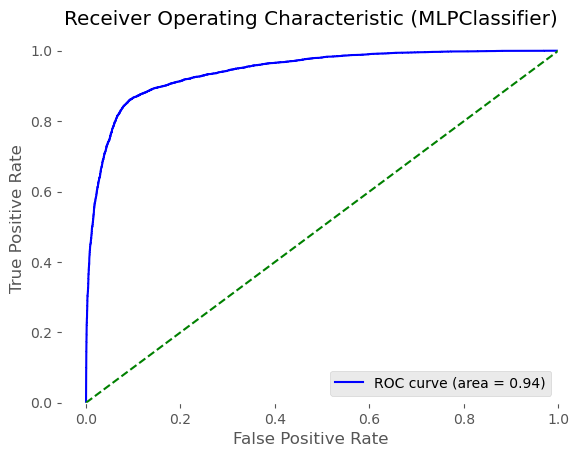

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create the MLPClassifier model
ann_model = MLPClassifier()

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ann_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best MLPClassifier model with the optimal hyperparameters
best_ann_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_ann = best_ann_model.predict(X_test_resampled_std)
y_ann_prob = best_ann_model.predict_proba(X_test_resampled_std)

accuracy_score_ann = accuracy_score(y_test_resampled, y_ann)
print("Accuracy score for MLPClassifier: {:.2f}".format(accuracy_score_ann))

# Calculate precision, recall, and F1 scores
prec_ann = precision_score(y_test_resampled, y_ann)
rec_ann = recall_score(y_test_resampled, y_ann)
f1_ann = f1_score(y_test_resampled, y_ann)
print("Precision score for MLPClassifier: {:.2f}".format(prec_ann))
print("Recall score for MLPClassifier: {:.2f}".format(rec_ann))
print("F1 score for MLPClassifier: {:.2f}".format(f1_ann))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_ann).ravel()
sens_ann = tp / (tp + fn)
spec_ann = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_ann_prob[:, 1])
auc_ann = roc_auc_score(y_test_resampled, y_ann_prob[:, 1])

print("Sensitivity score for MLPClassifier: {:.2f}".format(sens_ann))
print("Specificity score for MLPClassifier: {:.2f}".format(spec_ann))
print("AUC score for MLPClassifier: {:.2f}".format(auc_ann))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ann)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (MLPClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [37]:
from sklearn.ensemble import AdaBoostClassifier
import time

# Create an instance of the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Start the timer to measure the training time
start = time.time()

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train_resampled_std, y_train_resampled)

# Stop the timer and calculate the training time
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predict the labels for the test set using the trained AdaBoost model
y_adaboost = adaboost_model.predict(X_test_resampled_std)

# Predict the class probabilities for the test set using the trained AdaBoost model
y_adaboost_prob = adaboost_model.predict_proba(X_test_resampled_std)

Finished training within 1.72 seconds


Accuracy score for AdaBoostClassifier: 0.85
Precision score for AdaBoostClassifier: 0.82
Recall score for AdaBoostClassifier: 0.75
F1 score for AdaBoostClassifier: 0.79
Sensitivity score for AdaBoostClassifier: 0.75
Specificity score for AdaBoostClassifier: 0.91
AUC score for AdaBoostClassifier: 0.92


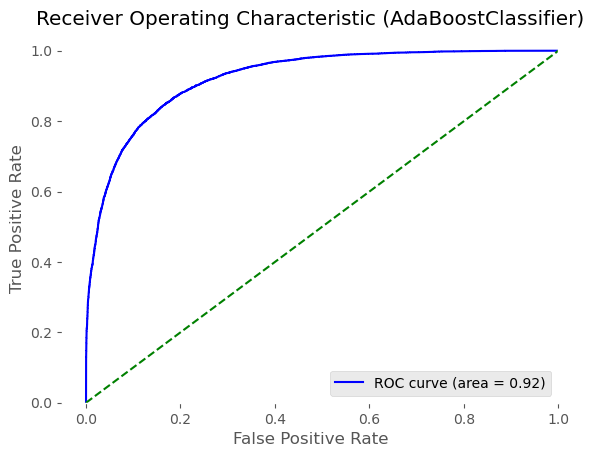

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(adaboost_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best AdaBoostClassifier model with the optimal hyperparameters
best_adaboost_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_adaboost = best_adaboost_model.predict(X_test_resampled_std)
y_adaboost_prob = best_adaboost_model.predict_proba(X_test_resampled_std)

accuracy_score_adaboost = accuracy_score(y_test_resampled, y_adaboost)
print("Accuracy score for AdaBoostClassifier: {:.2f}".format(accuracy_score_adaboost))

# Calculate precision, recall, and F1 scores
prec_adaboost = precision_score(y_test_resampled, y_adaboost)
rec_adaboost = recall_score(y_test_resampled, y_adaboost)
f1_adaboost = f1_score(y_test_resampled, y_adaboost)
print("Precision score for AdaBoostClassifier: {:.2f}".format(prec_adaboost))
print("Recall score for AdaBoostClassifier: {:.2f}".format(rec_adaboost))
print("F1 score for AdaBoostClassifier: {:.2f}".format(f1_adaboost))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_adaboost).ravel()
sens_adaboost = tp / (tp + fn)
spec_adaboost = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_adaboost_prob[:, 1])
auc_adaboost = roc_auc_score(y_test_resampled, y_adaboost_prob[:, 1])

print("Sensitivity score for AdaBoostClassifier: {:.2f}".format(sens_adaboost))
print("Specificity score for AdaBoostClassifier: {:.2f}".format(spec_adaboost))
print("AUC score for AdaBoostClassifier: {:.2f}".format(auc_adaboost))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_adaboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (AdaBoostClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [39]:
from catboost import CatBoostClassifier
import time

# CatBoost
start = time.time()
catboost_model = CatBoostClassifier(iterations=100, random_state=42)
catboost_model.fit(X_train_resampled_std, y_train_resampled)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_catboost = catboost_model.predict(X_test_resampled_std)
y_catboost_prob = catboost_model.predict_proba(X_test_resampled_std)

Learning rate set to 0.38284
0:	learn: 0.4991231	total: 411ms	remaining: 40.7s
1:	learn: 0.4269580	total: 418ms	remaining: 20.5s
2:	learn: 0.3949388	total: 495ms	remaining: 16s
3:	learn: 0.3739744	total: 519ms	remaining: 12.4s
4:	learn: 0.3589326	total: 550ms	remaining: 10.4s
5:	learn: 0.3480028	total: 557ms	remaining: 8.73s
6:	learn: 0.3404475	total: 563ms	remaining: 7.48s
7:	learn: 0.3329292	total: 569ms	remaining: 6.54s
8:	learn: 0.3289037	total: 575ms	remaining: 5.82s
9:	learn: 0.3252807	total: 581ms	remaining: 5.22s
10:	learn: 0.3205372	total: 586ms	remaining: 4.74s
11:	learn: 0.3161003	total: 593ms	remaining: 4.35s
12:	learn: 0.3133422	total: 598ms	remaining: 4s
13:	learn: 0.3110147	total: 663ms	remaining: 4.07s
14:	learn: 0.3083596	total: 669ms	remaining: 3.79s
15:	learn: 0.3063629	total: 676ms	remaining: 3.55s
16:	learn: 0.3041470	total: 684ms	remaining: 3.34s
17:	learn: 0.3016807	total: 690ms	remaining: 3.15s
18:	learn: 0.2999256	total: 697ms	remaining: 2.97s
19:	learn: 0.2978

0:	learn: 0.6873167	total: 4.42ms	remaining: 437ms
1:	learn: 0.6819513	total: 8.77ms	remaining: 430ms
2:	learn: 0.6763947	total: 12.9ms	remaining: 418ms
3:	learn: 0.6709357	total: 17.2ms	remaining: 413ms
4:	learn: 0.6657184	total: 21.2ms	remaining: 402ms
5:	learn: 0.6606327	total: 25.6ms	remaining: 400ms
6:	learn: 0.6551841	total: 30.1ms	remaining: 400ms
7:	learn: 0.6503368	total: 34.8ms	remaining: 400ms
8:	learn: 0.6455860	total: 39.4ms	remaining: 399ms
9:	learn: 0.6407785	total: 44.4ms	remaining: 399ms
10:	learn: 0.6363104	total: 49.1ms	remaining: 398ms
11:	learn: 0.6319518	total: 54.4ms	remaining: 399ms
12:	learn: 0.6276203	total: 58.6ms	remaining: 392ms
13:	learn: 0.6236602	total: 63.3ms	remaining: 389ms
14:	learn: 0.6196282	total: 67.6ms	remaining: 383ms
15:	learn: 0.6158205	total: 71.7ms	remaining: 377ms
16:	learn: 0.6118520	total: 76.3ms	remaining: 373ms
17:	learn: 0.6080407	total: 80.9ms	remaining: 368ms
18:	learn: 0.6040281	total: 85.3ms	remaining: 364ms
19:	learn: 0.6002346	t

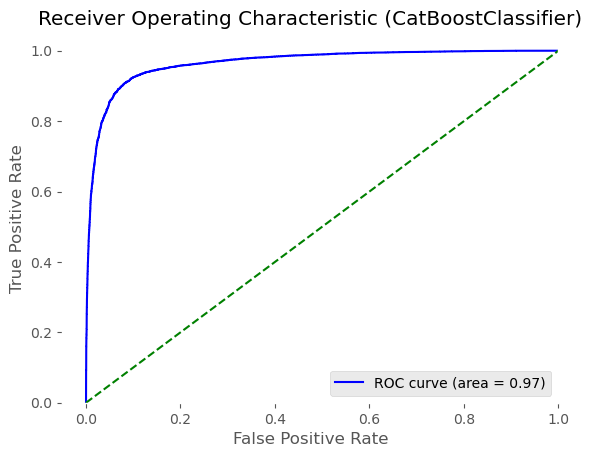

In [49]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create the CatBoostClassifier model
catboost_model = CatBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [4, 6, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(catboost_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best CatBoostClassifier model with the optimal hyperparameters
best_catboost_model = grid_search.best_estimator_

# Fit the best model on the training data
best_catboost_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_catboost = best_catboost_model.predict(X_test_resampled_std)
y_catboost_prob = best_catboost_model.predict_proba(X_test_resampled_std)

accuracy_score_catboost = accuracy_score(y_test_resampled, y_catboost)
print("Accuracy score for CatBoostClassifier: {:.2f}".format(accuracy_score_catboost))

# Calculate precision, recall, and F1 scores
prec_catboost = precision_score(y_test_resampled, y_catboost)
rec_catboost = recall_score(y_test_resampled, y_catboost)
f1_catboost = f1_score(y_test_resampled, y_catboost)
print("Precision score for CatBoostClassifier: {:.2f}".format(prec_catboost))
print("Recall score for CatBoostClassifier: {:.2f}".format(rec_catboost))
print("F1 score for CatBoostClassifier: {:.2f}".format(f1_catboost))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_catboost).ravel()
sens_catboost = tp / (tp + fn)
spec_catboost = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_catboost_prob[:, 1])
auc_catboost = roc_auc_score(y_test_resampled, y_catboost_prob[:, 1])

print("Sensitivity score for CatBoostClassifier: {:.2f}".format(sens_catboost))
print("Specificity score for CatBoostClassifier: {:.2f}".format(spec_catboost))
print("AUC score for CatBoostClassifier: {:.2f}".format(auc_catboost))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_catboost)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (CatBoostClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [45]:
from sklearn.neural_network import MLPClassifier
import time

# MLP
start = time.time()
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_resampled_std, y_train_resampled)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_mlp = mlp_model.predict(X_test_resampled_std)
y_mlp_prob = mlp_model.predict_proba(X_test_resampled_std)

Finished training within 64.29 seconds


Accuracy score for MLPClassifier: 0.89
Precision score for MLPClassifier: 0.86
Recall score for MLPClassifier: 0.82
F1 score for MLPClassifier: 0.84
Sensitivity score for MLPClassifier: 0.82
Specificity score for MLPClassifier: 0.92
AUC score for MLPClassifier: 0.94


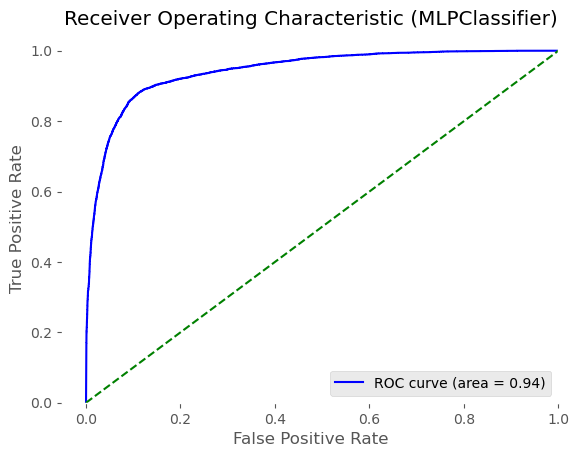

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create the MLPClassifier model
mlp_model = MLPClassifier()

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled_std, y_train_resampled)

# Get the best MLPClassifier model with the optimal hyperparameters
best_mlp_model = grid_search.best_estimator_

# Fit the best model on the training data
best_mlp_model.fit(X_train_resampled_std, y_train_resampled)

# Predict the test set results using the best model
y_mlp = best_mlp_model.predict(X_test_resampled_std)
y_mlp_prob = best_mlp_model.predict_proba(X_test_resampled_std)

accuracy_score_mlp = accuracy_score(y_test_resampled, y_mlp)
print("Accuracy score for MLPClassifier: {:.2f}".format(accuracy_score_mlp))

# Calculate precision, recall, and F1 scores
prec_mlp = precision_score(y_test_resampled, y_mlp)
rec_mlp = recall_score(y_test_resampled, y_mlp)
f1_mlp = f1_score(y_test_resampled, y_mlp)
print("Precision score for MLPClassifier: {:.2f}".format(prec_mlp))
print("Recall score for MLPClassifier: {:.2f}".format(rec_mlp))
print("F1 score for MLPClassifier: {:.2f}".format(f1_mlp))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test_resampled, y_mlp).ravel()
sens_mlp = tp / (tp + fn)
spec_mlp = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test_resampled, y_mlp_prob[:, 1])
auc_mlp = roc_auc_score(y_test_resampled, y_mlp_prob[:, 1])

print("Sensitivity score for MLPClassifier: {:.2f}".format(sens_mlp))
print("Specificity score for MLPClassifier: {:.2f}".format(spec_mlp))
print("AUC score for MLPClassifier: {:.2f}".format(auc_mlp))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_mlp)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (MLPClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

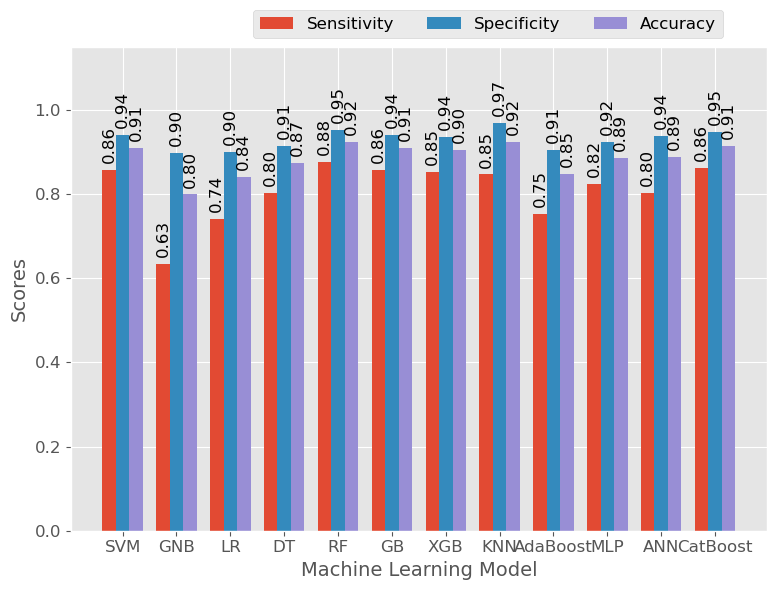

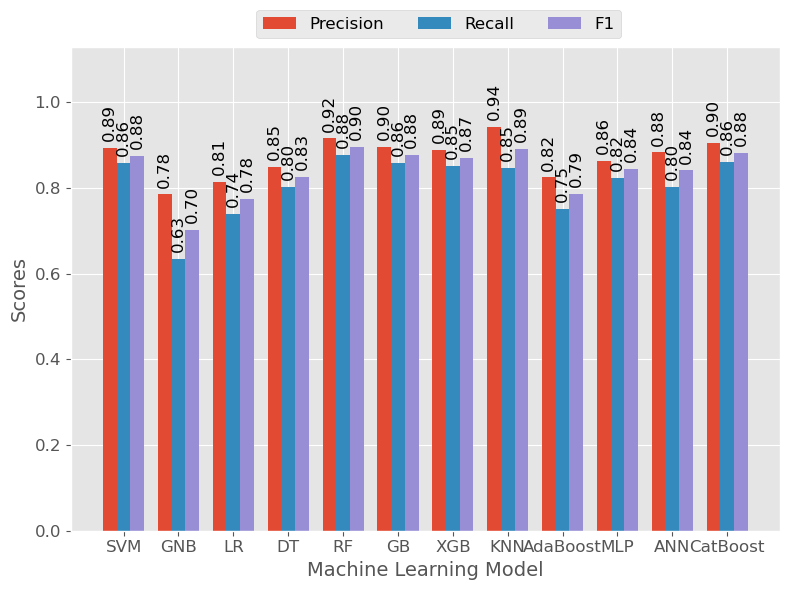

In [54]:
import numpy as np
import matplotlib.pyplot as plt

ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN', 'AdaBoost', 'MLP', 'ANN', 'CatBoost']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_gb, sens_xgb, sens_knn, sens_adaboost, sens_mlp, sens_ann, sens_catboost]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_gb, spec_xgb, spec_knn, spec_adaboost, spec_mlp, spec_ann, spec_catboost]
#auc_all = [auc_svm, auc_gnb, auc_lr, auc_dtree, auc_ranfor, auc_gb, auc_xgb, auc_knn, auc_adaboost, auc_mlp, auc_ann, auc_catboost]
prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_gb, prec_xgb, prec_knn, prec_adaboost, prec_mlp, prec_ann, prec_catboost]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_gb, rec_xgb, rec_knn, rec_adaboost, rec_mlp, rec_ann, rec_catboost]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_gb, f1_xgb, f1_knn, f1_adaboost, f1_mlp, f1_ann, f1_catboost]
accuracy_all = [accuracy_score_svm, accuracy_score_gnb, accuracy_score_logit, accuracy_score_dtree, accuracy_score_ranfor, accuracy_score_gb, accuracy_score_xgb, accuracy_score_knn, accuracy_score_adaboost, accuracy_score_mlp, accuracy_score_ann, accuracy_score_catboost]

def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Plot sensitivity, specificity, accuracy, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, accuracy_all, width, label='Accuracy')

ax.set_ylim([0, 1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_scores.pdf", bbox_inches='tight')
plt.show()

# Plot precision, recall, and F1 score
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')

ax.set_ylim([0, 1.13])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

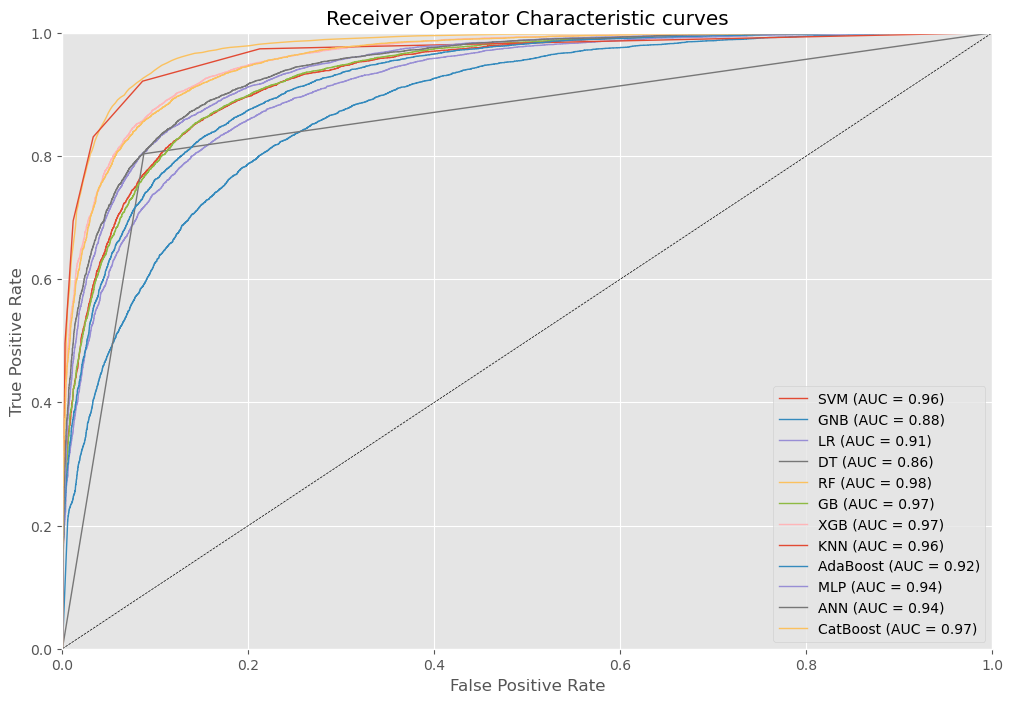

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.3f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test_resampled, svm_model.predict_proba(X_test_resampled.values), label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test_resampled, gnb_model.predict_proba(X_test_resampled.values), label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test_resampled, logit_model.predict_proba(X_test_resampled.values), label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test_resampled, dtree_model.predict_proba(X_test_resampled.values), label='DT', l='-', auc_value=auc_dtree)
roc_auc_plot(y_test_resampled, ranfor_model.predict_proba(X_test_resampled.values), label='RF', l='-', auc_value=auc_ranfor)
roc_auc_plot(y_test_resampled, gb_model.predict_proba(X_test_resampled.values), label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test_resampled, xgb_model.predict_proba(X_test_resampled.values), label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test_resampled, knn_model.predict_proba(X_test_resampled.values), label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test_resampled, adaboost_model.predict_proba(X_test_resampled.values), label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test_resampled, mlp_model.predict_proba(X_test_resampled.values), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test_resampled, ann_model.predict_proba(X_test_resampled.values), label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test_resampled, catboost_model.predict_proba(X_test_resampled.values), label='CatBoost', l='-', auc_value=auc_catboost)

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
sns.despine()

plt.show()

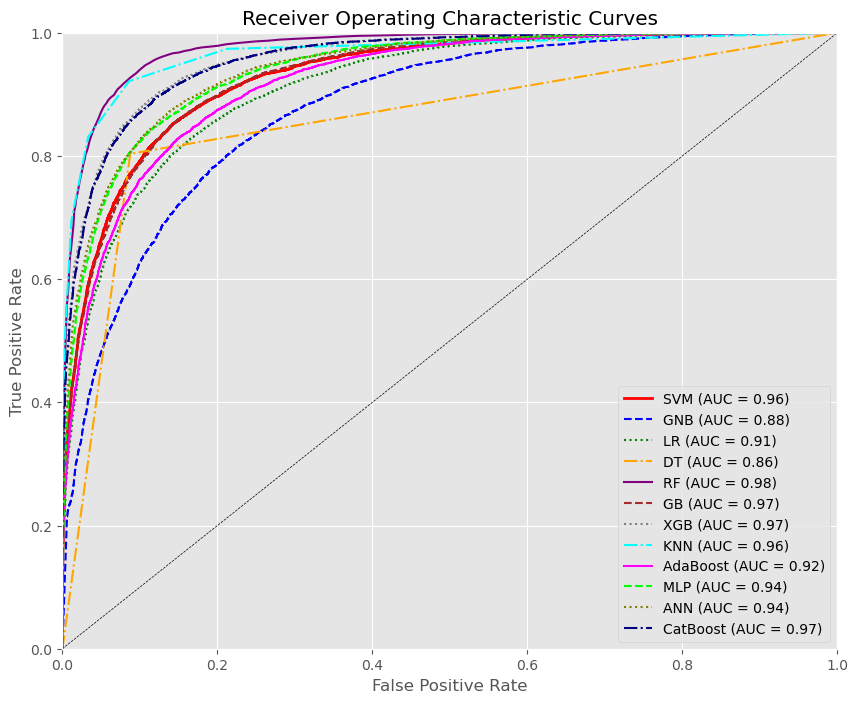

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, auc_value=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (AUC = %.3f)" % (label, auc_value))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title('Receiver Operator Characteristic curves')
    sns.despine()

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test_resampled, svm_model.predict_proba(X_test_resampled.values), label='SVM', l='-', auc_value=auc_svm)
roc_auc_plot(y_test_resampled, gnb_model.predict_proba(X_test_resampled.values), label='GNB', l='-', auc_value=auc_gnb)
roc_auc_plot(y_test_resampled, logit_model.predict_proba(X_test_resampled.values), label='LR', l='-', auc_value=auc_logit)
roc_auc_plot(y_test_resampled, dtree_model.predict_proba(X_test_resampled.values), label='DT', l='-', auc_value=auc_dtree)
roc_auc_plot(y_test_resampled, ranfor_model.predict_proba(X_test_resampled.values), label='RF', l='-', auc_value=auc_ranfor)
roc_auc_plot(y_test_resampled, gb_model.predict_proba(X_test_resampled.values), label='GB', l='-', auc_value=auc_gb)
roc_auc_plot(y_test_resampled, xgb_model.predict_proba(X_test_resampled.values), label='XGB', l='-', auc_value=auc_xgb)
roc_auc_plot(y_test_resampled, knn_model.predict_proba(X_test_resampled.values), label='KNN', l='-', auc_value=auc_knn)
roc_auc_plot(y_test_resampled, adaboost_model.predict_proba(X_test_resampled.values), label='AdaBoost', l='-', auc_value=auc_adaboost)
roc_auc_plot(y_test_resampled, mlp_model.predict_proba(X_test_resampled.values), label='MLP', l='-', auc_value=auc_mlp)
roc_auc_plot(y_test_resampled, ann_model.predict_proba(X_test_resampled.values), label='ANN', l='-', auc_value=auc_ann)
roc_auc_plot(y_test_resampled, catboost_model.predict_proba(X_test_resampled.values), label='CatBoost', l='-', auc_value=auc_catboost)

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
sns.despine()

plt.show()